# The Convolution2D
Here we take an 2d input matrix of any size and another 2d input matrix generally called kernel 
which is smaller in size than input matrix (here taken 3x3) and we slide this kernel over the input matrix 
performing element wise multiplication and adding then up which in turn results in a output matrix of smaller
size than input matrix generally given by formulla (I - K + 1) where I is size of input , K is size of Kernel.
For eg: Input shape = (6, 4), Kernel shape = (3, 3)
Output shape given by formula = (6 - 3 + 1, 4 - 3 + 1) = (4, 2)

If we filp the provided kernel 180 degrees and then performed the sliding multiplication and addition then it is actually called convolution. Without flipping the kernel it is called cross correlation.
Technically, flipping 180 degrees here just means switching positions of values of kernel which are just number placed differently on not flipping 180 degrees.
Here we are actually performing the cross correlation as I have commented the flipping code

## 1. Libraries

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## 2. Convolution function

In [2]:
def kernel_convolution(mat, kernel):
    mat_row, mat_col = mat.shape
    kernel_row, kernel_col = kernel.shape
    
    kernel = np.flip()
    
    # output matrix of convolution M(i,j)
    conv_out = lambda x, y : x - y + 1
    i, j = conv_out(mat_row, kernel_row), conv_out(mat_col, kernel_col)
    
    conv_sum = []
    for p in range(i):
        for q in range(j):
            t = mat[p : 3 + p, q: 3 + q]
            s = t * kernel
            conv_sum.append(np.sum(s))
    
    conv_sum = np.reshape(conv_sum, (i, j))
    return conv_sum

## 3. Inputs and outputs

In [7]:
# Input matrix
mat = np.array([[12, 13, 4, 3, 7, 8],
                [-2, 5, 9, 0, 58, 22],
                [5, 2, 1, 9, 19, 27],
                [-32, 30, 2, 17, 13, 3]])

# Kernel
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

# Convolution
kernel_convolution(mat, kernel)

array([[ -10,   13, -119,  -67],
       [ -37,    4,  -96,  -44]])

## 3. Convolution on images

### i. Load image and convert to gray scale

(427, 640)


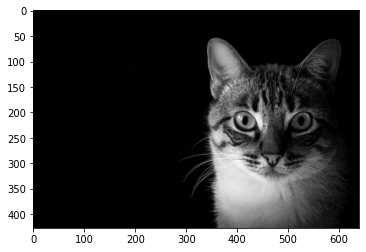

In [45]:
img = cv2.imread("images/cat.jpg", cv2.IMREAD_GRAYSCALE)
print(img.shape)
img = img / 255.
plt.imshow(img, cmap="gray")
plt.show()

### ii. Sharpning kernel convolution

(425, 638)


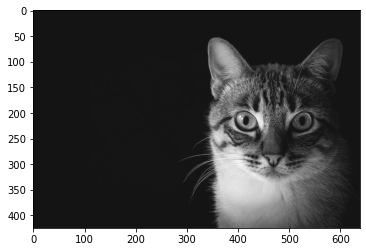

In [41]:
# sharpning kernel
kernel2 = np.array([[0, -1, 0],
                    [-1, 20, -1],
                    [0, -1, 0]])

# convolution
convoluted = kernel_convolution(img, kernel2)
print(convoluted.shape)
plt.imshow(convoluted, cmap="gray")
plt.show()

### iii. Horizontal lines seperator

(425, 638)


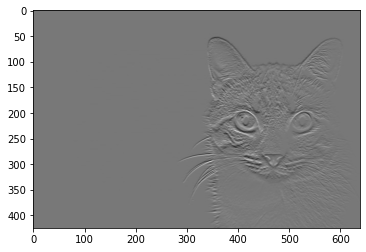

In [42]:
# horizontal seperator kernel
kernel4 = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]])


# convolution
convoluted = kernel_convolution(img, kernel4)
print(convoluted.shape)
plt.imshow(convoluted, cmap="gray")
plt.show()

### iv. Edge detector (sobel operator)

(425, 638)


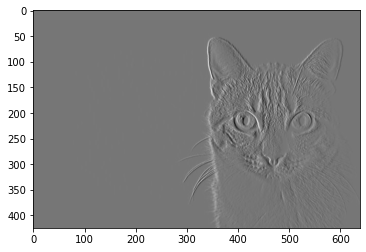

In [44]:
kernel4 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])


convoluted = kernel_convolution(img, kernel4)
print(convoluted.shape)
plt.imshow(convoluted, cmap="gray")
plt.show()